<a href="https://colab.research.google.com/github/coderanandmaurya/Feature-engineering/blob/main/Categorical_encoding.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Categorical Data encoding**
data:
- numerical(1,2,3,)
- categorical data:
  - nomial data: ( no relation betwwen them like state, all are equal)
  - ordinal data: (rank, order, review)

categorical data is mostly in string but ml used number so we encode categorical data: 
- ordinal encoder
- label encoding
- one hot encoder



# Ordinal encoding:
used to encode input col 
- label encoder used in target col

- if data is nominal use one hot encoding
- if data is ordered use ordinal encoder

In [1]:
import numpy as np
import pandas as pd

In [2]:
url="https://raw.githubusercontent.com/coderanandmaurya/Feature-engineering/main/customer.csv"
df = pd.read_csv(url)

In [3]:
df.head()

,age,gender,review,education,purchased
0,30,Female,Average,School,No
1,68,Female,Poor,UG,No
2,70,Female,Good,PG,No
3,72,Female,Good,PG,No
4,16,Female,Average,UG,No


In [4]:
df=df.iloc[:,2:5]

In [5]:
df.sample(3)

,review,education,purchased
19,Poor,PG,Yes
43,Poor,PG,No
37,Average,PG,Yes


In [6]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(df.iloc[:,0:2],df.iloc[:,2],test_size=0.3)

In [7]:
from sklearn.preprocessing import OrdinalEncoder

In [8]:
x_train.head(5)

,review,education
29,Average,UG
48,Good,UG
26,Poor,PG
25,Good,School
27,Poor,PG


In [9]:
categ=[['Poor','Average','Good'],['School','UG','PG']]
oe = OrdinalEncoder(categories=categ)

In [10]:
oe.fit(x_train)

OrdinalEncoder(categories=[['Poor', 'Average', 'Good'], ['School', 'UG', 'PG']])

In [11]:
new_xtrain=oe.transform(x_train)


In [12]:
new_xtest=oe.transform(x_test)

In [13]:
new_xtrain

array([[1., 1.],
       [2., 1.],
       [0., 2.],
       [2., 0.],
       [0., 2.],
       [0., 2.],
       [0., 0.],
       [1., 0.],
       [1., 1.],
       [2., 2.],
       [0., 2.],
       [2., 0.],
       [2., 1.],
       [0., 1.],
       [1., 2.],
       [0., 1.],
       [0., 2.],
       [1., 1.],
       [2., 2.],
       [2., 2.],
       [1., 1.],
       [2., 1.],
       [0., 1.],
       [1., 2.],
       [2., 0.],
       [1., 0.],
       [0., 0.],
       [0., 0.],
       [1., 0.],
       [2., 2.],
       [0., 0.],
       [2., 0.],
       [1., 0.],
       [0., 2.],
       [1., 1.]])

In [14]:
new_xtest

array([[0., 1.],
       [2., 2.],
       [2., 0.],
       [0., 2.],
       [2., 1.],
       [2., 1.],
       [2., 2.],
       [0., 2.],
       [0., 0.],
       [0., 2.],
       [2., 1.],
       [1., 1.],
       [1., 2.],
       [2., 0.],
       [1., 0.]])

# **Label Encoding**

In [15]:
from sklearn.preprocessing import LabelEncoder

In [16]:
le = LabelEncoder()

In [17]:
le.fit(y_train)

LabelEncoder()

In [18]:
le.classes_

array(['No', 'Yes'], dtype=object)

In [19]:
y_train = le.transform(y_train)
y_test = le.transform(y_test)

In [20]:
y_train

array([1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0])

# **Handling Nominal data**
using one hot encoding

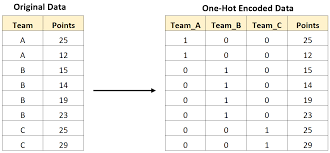

## **Dummy Variable Trap:**
- The Dummy variable trap is a scenario where there are attributes that are highly correlated (Multicollinear) and one variable predicts the value of others. When we use one-hot encoding for handling the categorical data, then one dummy variable (attribute) can be predicted with the help of other dummy variables. Hence, one dummy variable is highly correlated with other dummy variables. Using all dummy variables for regression models leads to a dummy variable trap. So, the regression models should be designed to exclude one dummy variable. 

<figure>
<center>
<img src='https://lh6.googleusercontent.com/GKCJjLJn0F4AurkOb24FNK4-rxFekazmnJwJ4TuQsmtDO92VGSk5N6OfMH0R92FZgxulTkbsrG2ChD053ld-l3l_2t6i113H42FPms-C--tgYh4g6Z43xxszbDTko71vTaQnGlES' />
</center>
</figure>

<figure>
<center>
<img src='https://lh3.googleusercontent.com/eT8_VSkAgUeevU-y1rsnYlj4XBDopBPYXITJ4Q4KE-yjq54HIkeWmtwhvencL8piO8SdgiOefqlZEwz0fGv7tMvDNdX0Co2WA9U7t-u252nR43uWnjvH3xD9c-q5V2_eA863tyJE' />
</center>
</figure>

In [21]:
murl="https://raw.githubusercontent.com/coderanandmaurya/Feature-engineering/main/CAR%20DETAILS%20FROM%20CAR%20DEKHO.csv"

In [22]:
data=pd.read_csv(murl)

In [23]:
data.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [24]:
data["fuel"].value_counts()

Diesel      2153
Petrol      2123
CNG           40
LPG           23
Electric       1
Name: fuel, dtype: int64

# **OHE using pandas**

In [25]:
pd.get_dummies(data,columns=['fuel'])

,name,year,selling_price,km_driven,seller_type,transmission,owner,fuel_CNG,fuel_Diesel,fuel_Electric,fuel_LPG,fuel_Petrol
0,Maruti 800 AC,2007,60000,70000,Individual,Manual,First Owner,0,0,0,0,1
1,Maruti Wagon R LXI Minor,2007,135000,50000,Individual,Manual,First Owner,0,0,0,0,1
2,Hyundai Verna 1.6 SX,2012,600000,100000,Individual,Manual,First Owner,0,1,0,0,0
3,Datsun RediGO T Option,2017,250000,46000,Individual,Manual,First Owner,0,0,0,0,1
4,Honda Amaze VX i-DTEC,2014,450000,141000,Individual,Manual,Second Owner,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
4335,Hyundai i20 Magna 1.4 CRDi (Diesel),2014,409999,80000,Individual,Manual,Second Owner,0,1,0,0,0
4336,Hyundai i20 Magna 1.4 CRDi,2014,409999,80000,Individual,Manual,Second Owner,0,1,0,0,0
4337,Maruti 800 AC BSIII,2009,110000,83000,Individual,Manual,Second Owner,0,0,0,0,1
4338,Hyundai Creta 1.6 CRDi SX Option,2016,865000,90000,Individual,Manual,First Owner,0,1,0,0,0


2. **(n-1) OHE**

In [26]:
pd.get_dummies(data,columns=['fuel'],drop_first=True).head(3)

,name,year,selling_price,km_driven,seller_type,transmission,owner,fuel_Diesel,fuel_Electric,fuel_LPG,fuel_Petrol
0,Maruti 800 AC,2007,60000,70000,Individual,Manual,First Owner,0,0,0,1
1,Maruti Wagon R LXI Minor,2007,135000,50000,Individual,Manual,First Owner,0,0,0,1
2,Hyundai Verna 1.6 SX,2012,600000,100000,Individual,Manual,First Owner,1,0,0,0


# **OHE using sklearn**

In [36]:
from sklearn.model_selection import train_test_split
col=["name","km_driven",'fuel',"owner"]
X_train,X_test,Y_train,Y_test = train_test_split(data.loc[:,col],data.iloc[:,-1],test_size=0.2,random_state=2)

In [37]:
X_train.head()

,name,km_driven,fuel,owner
3581,Volkswagen Ameo 1.5 TDI Highline,70000,Diesel,First Owner
4191,Mahindra Scorpio VLX 2WD AIRBAG SE BSIV,72000,Diesel,First Owner
2450,Maruti Ciaz 1.4 AT Zeta,40000,Petrol,First Owner
984,Fiat Grande Punto EVO 1.3 Dynamic,70000,Diesel,First Owner
3546,Maruti Swift 1.2 DLX,35000,Petrol,First Owner


In [40]:
from sklearn.preprocessing import OneHotEncoder

In [41]:
ohe = OneHotEncoder(drop='first',sparse=False,dtype=np.int32)

In [42]:
X_train_new = ohe.fit_transform(X_train[['fuel','owner']])

In [43]:
X_test_new = ohe.transform(X_test[['fuel','owner']])

In [52]:
X_train_new

array([[1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 1, 0, 0]], dtype=int32)

In [55]:
X_train[['name',"km_driven"]]

,name,km_driven
3581,Volkswagen Ameo 1.5 TDI Highline,70000
4191,Mahindra Scorpio VLX 2WD AIRBAG SE BSIV,72000
2450,Maruti Ciaz 1.4 AT Zeta,40000
984,Fiat Grande Punto EVO 1.3 Dynamic,70000
3546,Maruti Swift 1.2 DLX,35000
...,...,...
3335,Hyundai Grand i10 1.2 Kappa Asta,32000
1099,Honda City i DTEC VX,110000
2514,Hyundai i20 Magna Optional 1.4 CRDi,50000
3606,Mahindra Xylo D2,70000


In [45]:
np.hstack((X_train[['name','km_driven']].values,X_train_new))

array([['Volkswagen Ameo 1.5 TDI Highline', 70000, 1, ..., 0, 0, 0],
       ['Mahindra Scorpio VLX 2WD AIRBAG SE BSIV', 72000, 1, ..., 0, 0,
        0],
       ['Maruti Ciaz 1.4 AT Zeta', 40000, 0, ..., 0, 0, 0],
       ...,
       ['Hyundai i20 Magna Optional 1.4 CRDi', 50000, 1, ..., 0, 0, 0],
       ['Mahindra Xylo D2', 70000, 1, ..., 0, 0, 0],
       ['Datsun RediGO 1.0 S', 15000, 0, ..., 1, 0, 0]], dtype=object)

## 4. **OHE with Top Categories**

In [47]:
counts = data['name'].value_counts()

In [48]:
data['name'].nunique()
threshold = 100

In [49]:
repl = counts[counts <= threshold].index

In [50]:
pd.get_dummies(data['name'].replace(repl, 'uncommon')).sample(5)

,uncommon
148,1
849,1
1970,1
2525,1
2411,1
